<div class="alert alert-warning">
    <h1 align="center">20 News Groups</h1>
    <h3 align="center">Parisa Salmani</h3>
</div>

## Objective:

The 20 Newsgroups data set is a collection of A number of newspapers group documents, partitioned (nearly) evenly across 20 different newsgroups. To the best of my knowledge, it was originally collected by Ken Lang, probably for his Newsweeder: Learning to filter netnews paper, though he does not explicitly mention this collection. The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.

###### Computer
- Graphics
- os.ms-windows.misc
- sys.ibm.pc.hardware
- sys.mac.hardware
- windows.x
##### Record
- Autos
- Motorcycles
- sport.baseball
- sport.hockey
###### Scientific
- crypt
- electronics
- media
- space
###### talk
- politics.guns
- politics.mideast
- politics.misc
- religion.misc
###### Society
- religion. Christian
###### Other
- forsale
###### alt
- atheism

## Environment Setup & Dataset Loading:

In [17]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

##  Preparing & Preprocessing the Data:

In [19]:
vectorizer = TfidfVectorizer() #Convert a collection of raw documents to a matrix of TF-IDF features. 
# Inverse Document Frequency (TFIDF) is a technique for text vectorization based on the Bag of words (BoW) model. 
vectors_train = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)
print(vectors_train.shape)

(11314, 130107)


## Visualizing the Data

In [20]:
print('Training data size:', len(newsgroups_train['data']))
print('Test data size:', len(newsgroups_test['data']))

Training data size: 11314
Test data size: 7532


In [21]:
#to return the number of appearance (frequency) of each news group
targets, frequency = np.unique(newsgroups_train.target, return_counts=True)
targets_str = np.array(newsgroups_train.target_names)
print(list(zip(targets_str, frequency)))

[('alt.atheism', 480), ('comp.graphics', 584), ('comp.os.ms-windows.misc', 591), ('comp.sys.ibm.pc.hardware', 590), ('comp.sys.mac.hardware', 578), ('comp.windows.x', 593), ('misc.forsale', 585), ('rec.autos', 594), ('rec.motorcycles', 598), ('rec.sport.baseball', 597), ('rec.sport.hockey', 600), ('sci.crypt', 595), ('sci.electronics', 591), ('sci.med', 594), ('sci.space', 593), ('soc.religion.christian', 599), ('talk.politics.guns', 546), ('talk.politics.mideast', 564), ('talk.politics.misc', 465), ('talk.religion.misc', 377)]


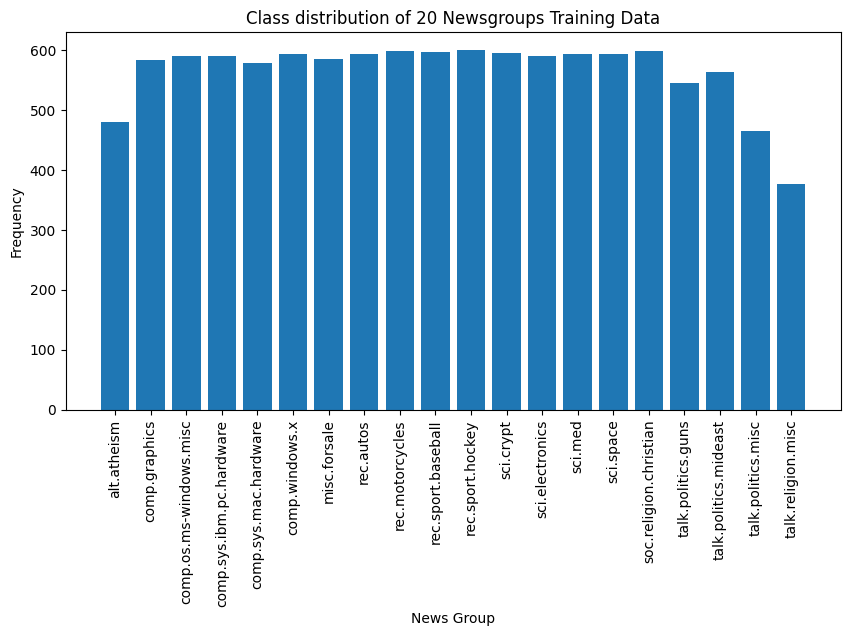

In [22]:
fig=plt.figure(figsize=(10, 5), dpi= 100)
plt.bar(targets_str,frequency)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Training Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()


In [23]:
pd.DataFrame({'data': newsgroups_train.data, 'target': newsgroups_train.target})

,data,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14
...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1


In [24]:
targets_test, frequency_test = np.unique(newsgroups_test.target, return_counts=True)
targets_test_str = np.array(newsgroups_test.target_names)
print(list(zip(targets_test_str, frequency_test)))

[('alt.atheism', 319), ('comp.graphics', 389), ('comp.os.ms-windows.misc', 394), ('comp.sys.ibm.pc.hardware', 392), ('comp.sys.mac.hardware', 385), ('comp.windows.x', 395), ('misc.forsale', 390), ('rec.autos', 396), ('rec.motorcycles', 398), ('rec.sport.baseball', 397), ('rec.sport.hockey', 399), ('sci.crypt', 396), ('sci.electronics', 393), ('sci.med', 396), ('sci.space', 394), ('soc.religion.christian', 398), ('talk.politics.guns', 364), ('talk.politics.mideast', 376), ('talk.politics.misc', 310), ('talk.religion.misc', 251)]


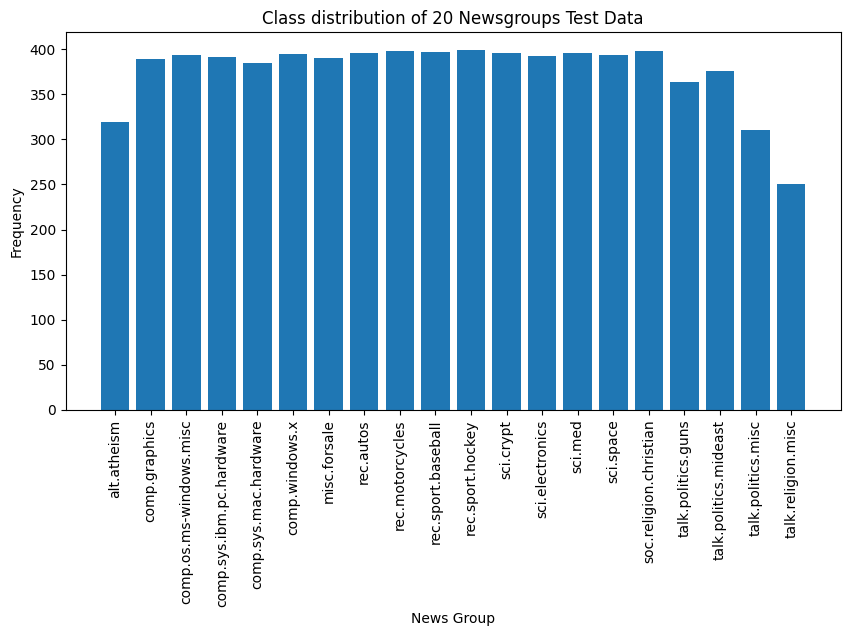

In [25]:
fig=plt.figure(figsize=(10, 5), dpi= 100)
plt.bar(targets_test_str,frequency_test)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Test Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

In [26]:
pd.DataFrame({'data': newsgroups_test.data, 'target': newsgroups_test.target})

,data,target
0,From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...,7
1,From: Rick Miller <rick@ee.uwm.edu>\nSubject: ...,5
2,From: mathew <mathew@mantis.co.uk>\nSubject: R...,0
3,From: bakken@cs.arizona.edu (Dave Bakken)\nSub...,17
4,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,19
...,...,...
7527,From: richmond@spiff.Princeton.EDU (Stupendous...,14
7528,From: smytonj@murr11.alleg.edu (Jim Smyton)\nS...,4
7529,From: hhenderson@vax.clarku.edu\nSubject: RE: ...,9
7530,From: b859zam@utarlg.uta.edu \nSubject: INTEL ...,6


### Building & Training Model:

In [27]:
#train the model
clf = MultinomialNB(alpha=0.01)
clf.fit(vectors_train, newsgroups_train.target)

MultinomialNB(alpha=0.01)

### Evaluating Model:

In [28]:
# predict the group on test set
pred = clf.predict(vectors_test)
pd.DataFrame({"real value": newsgroups_test.target, "Predicted value": pred})

,real value,Predicted value
0,7,7
1,5,11
2,0,0
3,17,17
4,19,0
...,...,...
7527,14,14
7528,4,9
7529,9,9
7530,6,3


In [29]:
#accuracy 
metrics.accuracy_score(newsgroups_test.target, pred)

0.8352363250132767

In [30]:
print(classification_report(newsgroups_test.target,pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       319
           1       0.69      0.75      0.72       389
           2       0.74      0.63      0.68       394
           3       0.65      0.75      0.69       392
           4       0.83      0.84      0.83       385
           5       0.84      0.78      0.81       395
           6       0.82      0.78      0.80       390
           7       0.89      0.90      0.90       396
           8       0.93      0.96      0.95       398
           9       0.95      0.94      0.95       397
          10       0.95      0.97      0.96       399
          11       0.89      0.93      0.91       396
          12       0.79      0.77      0.78       393
          13       0.89      0.84      0.86       396
          14       0.87      0.91      0.89       394
          15       0.82      0.95      0.88       398
          16       0.76      0.91      0.83       364
          17       0.97    